In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# for graph drawn later
plt.figure(figsize=(10, 10), dpi=100)

# Loading the data
race = pd.read_csv('../data/races.csv', na_values='\\N')
results = pd.read_csv('../data/results.csv', na_values='\\N')
drivers = pd.read_csv('../data/drivers.csv', na_values='\\N',encoding='latin1')

<Figure size 1000x1000 with 0 Axes>

In [2]:
clean_result = results[['raceId', 'driverId', 'positionOrder']].rename(columns={'positionOrder': 'race_position'})
clean_races = race[['raceId','year']]
clean_driver = drivers[['driverId','code']]

master_df2 = clean_result.merge(clean_races, on='raceId',how='inner').merge(clean_driver,on='driverId',how='inner')

master_df2 = master_df2[master_df2['year'] >= 2010].copy()

driver_stats = master_df2.groupby(['driverId', 'code']).agg(race_count=('race_position', 'count'),mean_finish=('race_position', 'mean'),std_finish=('race_position', 'std')).reset_index()
final_analysis_df = driver_stats[driver_stats['race_count'] >= 30]
final_analysis_df = final_analysis_df.sort_values('mean_finish')
final_analysis_df.head(10)

,driverId,code,race_count,mean_finish,std_finish
0,1,HAM,304,4.805921,5.450512
47,830,VER,209,5.645933,5.997515
11,17,WEB,77,6.259740,6.090118
13,20,VET,257,6.540856,6.064053
2,3,ROS,136,6.683824,6.158045
61,844,LEC,149,7.557047,5.988031
63,846,NOR,128,7.851562,4.975673
74,857,PIA,46,7.891304,5.203538
5,8,RAI,195,8.769231,5.582842
39,822,BOT,247,8.967611,5.997879


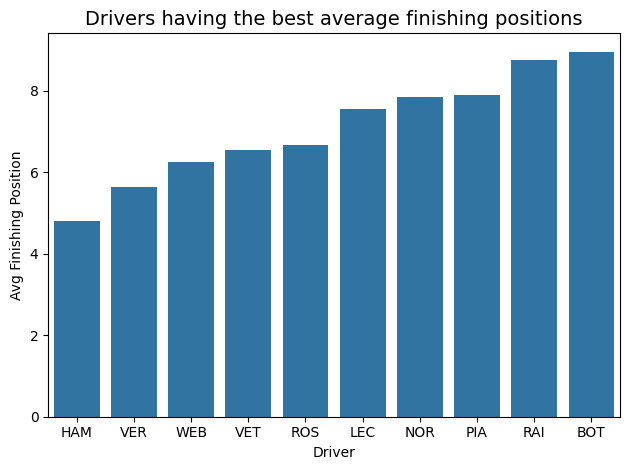

In [ ]:
top10 = (final_analysis_df.sort_values('mean_finish', ascending=True).head(10))

sns.barplot(data=top10,y='mean_finish',x='code',orient='v')

plt.title('Drivers having the best average finishing positions', fontsize=14)
plt.ylabel('Avg Finishing Position')
plt.xlabel('Driver')
plt.savefig('../visuals/avg_finishing_position.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

In [11]:
season_driver_stats = (master_df2.groupby(['year', 'driverId', 'code']).agg(races=('race_position', 'count'),avg_finish=('race_position', 'mean')).reset_index())
season_driver_stats.head()

,year,driverId,code,races,avg_finish
0,2010,1,HAM,19,6.421053
1,2010,2,HEI,5,12.600000
2,2010,3,ROS,19,8.263158
3,2010,4,ALO,19,5.421053
4,2010,5,KOV,19,17.000000


In [13]:
top10_drivers = (master_df2.groupby(['driverId', 'code']).size().reset_index(name='race_count').sort_values('race_count', ascending=False).head(10)['code'])
top10_drivers.head()

0     HAM
32    PER
3     ALO
13    VET
34    RIC
Name: code, dtype: object

In [14]:
season_driver_stats_top10 = season_driver_stats[season_driver_stats['code'].isin(top10_drivers)]

Text(0.5, 1.0, 'Driver Performance Trends: Average Race Finish (2010–2024) of top 10 drivers')

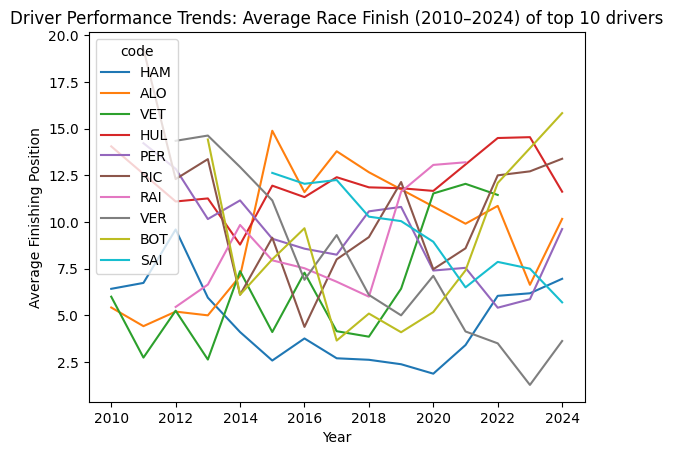

In [17]:
sns.lineplot(x='year',y='avg_finish', data=season_driver_stats_top10,hue='code')
plt.xlabel('Year')
plt.ylabel('Average Finishing Position')
plt.xticks(range(2010, 2025, 2))
plt.savefig('../visuals/driver_performance_trends_2010_2024.png', dpi=300, bbox_inches='tight')
plt.title('Driver Performance Trends: Average Race Finish (2010–2024) of top 10 drivers')